In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (10, 10),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params) 

from scipy.fftpack import fft, fftfreq

In [3]:
def idia(vgs):
    io = list()
    for v in vgs:
        i = 0        if (v < 1) else 0
        i = (v-1)*2  if (v >= 1  and v < 3) else i
        i = (4) if (v >= 3  ) else i
        io.append(i)
    return io

           16             15             14             13
7.513e-11 x  - 9.067e-09 x  + 4.958e-07 x  - 1.624e-05 x 
              12            11           10          9         8
 + 0.0003554 x  - 0.005476 x  + 0.06109 x  - 0.4997 x + 3.002 x
          7        6         5         4         3        2
 - 13.14 x + 41.2 x - 90.03 x + 131.1 x - 118.5 x + 58.1 x - 11.34 x + 0.001307


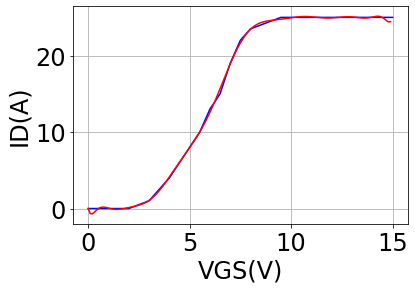

In [4]:
# Mediciones de una trasnferencia
vgs = np.array([0,0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5,  7, 7.5,   8, 8.5,   9, 9.5  ,10, 10.5, 11, 11.5,12,12.5,13,13.5,14,14.5, 15]) 
ids = np.array([0,  0, 0,   0, 0, 0.5, 1, 2.5, 4,   6, 8,  10,13,  15, 19,  22, 23.5, 24,24.5,  25, 25,   25, 25,   25,25,  25,25,  25,25,  25, 25]) 


# Ajuste con polinomio
orden = 16
z = np.polyfit((vgs),ids, orden)
print(np.poly1d(np.polyfit((vgs),ids, orden)))
p = np.poly1d(z)
 


plt.plot(vgs,ids,'b')

vgsa = np.arange(0,15,0.1)
plt.plot(vgsa,p(vgsa),'r')

#plt.axis([0, 15, -5, 30])
plt.grid()
plt.ylabel('ID(A)')
plt.xlabel('VGS(V)')
plt.show()






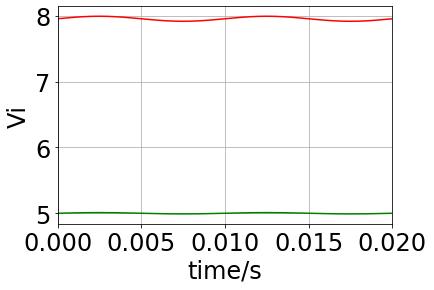

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


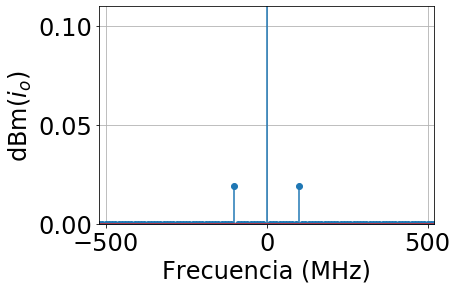

In [5]:
# grafico transferencia temporal 
Vpol = 5
vi   = 0.01
fm = 100
fs = 2000
ds = 1/fs
dm = 10/fm
time = np.arange(0,dm,dt)
vit =  Vpol + vi * np.sin(2*np.pi*fm*time)


iot = p(vit )

plt.plot(time,vit,'g')
plt.plot(time,iot,'r')
plt.xlim(0, 2/fm)
plt.grid()
plt.ylabel('Vi')
plt.xlabel('time/s')
plt.show()



Iof = fft(iot) / len(iot)  # Normalizada
frq = fftfreq(len(iot), ds)  # Recuperamos las frecuencias

plt.stem(frq, abs(Iof) )  
plt.xlim(-520, 520)
plt.ylim(0, 0.11)
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('dBm($i_o$)')
plt.grid()
plt.show()

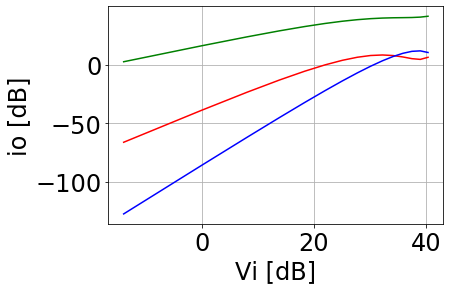

In [18]:
def iotf(vitf,fm,fs,Vpol):
    io1 = list()
    io2 = list()
    io3 = list()
    
    dt = 1/fs
    time = np.arange(0,10/fm,dt)
    N = len(time)
    for vi in vitf:
        vit =  Vpol + vi * np.sin(2*np.pi*fm*time)
        iot = p(vit )
        io1.append(abs(sum([s*np.exp(-2j*np.pi*n*10/N)/N for n,s in enumerate(iot)])))
        io2.append(abs(sum([s*np.exp(-2j*np.pi*n*20/N)/N for n,s in enumerate(iot)])))
        io3.append(abs(sum([s*np.exp(-2j*np.pi*n*30/N)/N for n,s in enumerate(iot)])))
    return io1, io2, io3



# grafico transferencia temporal 
Vpol = 7
vi   = 8
fm = 100
fs = 2000
dt = 1/fs
vitf = np.arange(0.5,vi, 0.5)

io1,io2,io3 = iotf(vitf,fm,fs,Vpol )


plt.plot(20*np.log(vitf),20*np.log(io1),'g')
plt.plot(20*np.log(vitf),20*np.log(io2),'r')
plt.plot(20*np.log(vitf),20*np.log(io3),'b')
#plt.ylim(0.01,1)
#plt.xlim(0.01,10)

plt.grid()
plt.ylabel('io [dB]')
plt.xlabel('Vi [dB]')
plt.show()

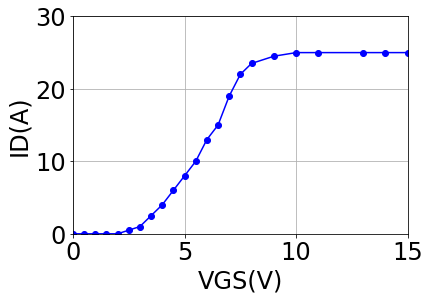

In [7]:
# Mediciones de una trasnferencia
vgs = np.array([0,0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5,  7, 7.5,   8,    9, 10, 11, 13, 14, 15]) 
ids = np.array([0,  0, 0,   0, 0, 0.5, 1, 2.5, 4,   6, 8,  10,13,  15, 19,  22, 23.5, 24.5, 25, 25, 25, 25, 25]) 


plt.plot(vgs,ids,'b')
plt.plot(vgs,ids,'bo')
plt.axis([0, 15, 0, 30])
plt.grid()
plt.ylabel('ID(A)')
plt.xlabel('VGS(V)')
plt.show()

            6           5          4         3        2
-0.0001754 x + 0.00848 x - 0.1499 x + 1.136 x - 3.13 x + 2.985 x - 0.4352


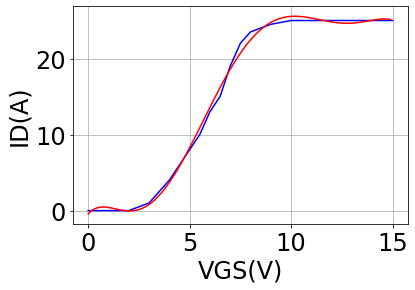

In [8]:
# Ajuste con polinomio
orden = 6
z = np.polyfit((vgs),ids, orden)
print(np.poly1d(np.polyfit((vgs),ids, orden)))
p = np.poly1d(z)
 


plt.plot(vgs,ids,'b')

vgsa = np.arange(0,15,0.1)
plt.plot(vgsa,p(vgsa),'r')

#plt.axis([0, 15, -5, 30])
plt.grid()
plt.ylabel('ID(A)')
plt.xlabel('VGS(V)')
plt.show()

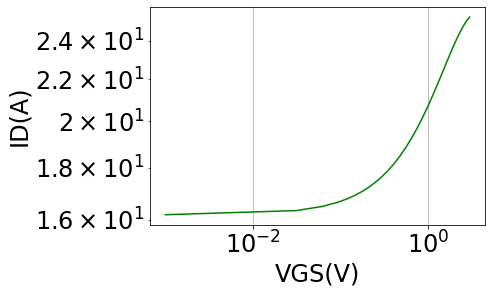

In [9]:
# Transferencia
vi   = np.linspace(0.001,3,100, endpoint=True)
Vpol = 6.5

io = p(vi + Vpol)


#plt.loglog(vi,vi,'r')
plt.loglog(vi,io,'g')
plt.grid()
plt.ylabel('ID(A)')
plt.xlabel('VGS(V)')
plt.show()

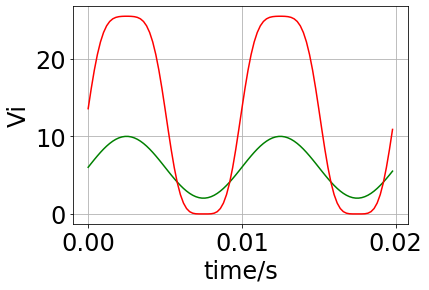

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


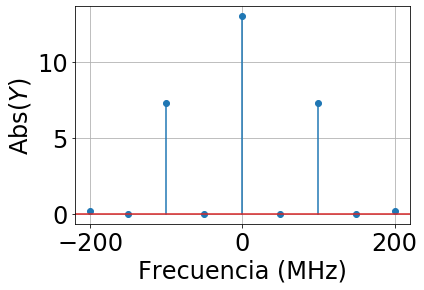

In [10]:
# grafico transferencia temporal 
Vpol = 6
vi   = 4
fm = 100
fs = 5000
dt = 1/fs
time = np.arange(0,2/fm,dt)
vit =  Vpol + vi * np.sin(2*np.pi*fm*time)


iot = p(vit )

plt.plot(time,vit,'g')
plt.plot(time,iot,'r')
plt.grid()
plt.ylabel('Vi')
plt.xlabel('time/s')
plt.show()



Iof = fft(iot) / len(iot)  # Normalizada
frq = fftfreq(len(iot), dt)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Iof) )  
plt.xlim(-220, 220)
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

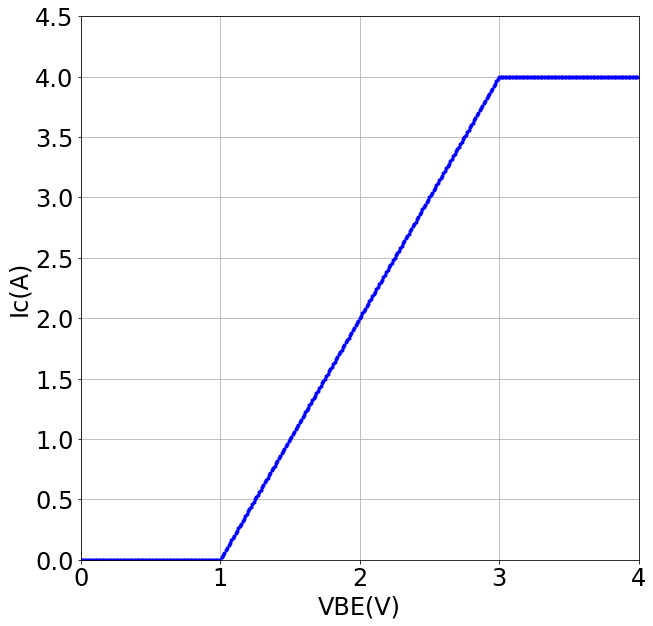

In [63]:


def idtt(v):
    ido = 0
    for o in range(orden+1):
        
        ido += z[o]*v**(orden-o) 
    return ido 


# 5A (v_{gs}-2.5V) - 0.045A (v_{gs}-2.5V)^3
def idia(v):
    i = 0             if (v < 1) else 0
    i = (v-1)*2  if (v >= 1  and v < 3) else i
    i = (4) if (v >= 3  ) else i
    return i


vgsa = np.arange(0,4,0.01)
idsa = []
for v in vgsa:
    idsa.append(idia(v))

plt.plot(vgsa,idsa,'b.')
plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('VBE(V)')
plt.show()

           6           5          4          3          2
0.0005834 x - 0.01526 x + 0.1287 x - 0.3805 x + 0.6815 x - 0.6885 x + 0.05883


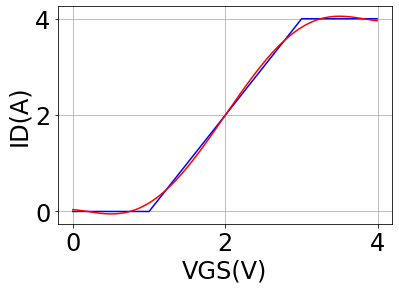

In [13]:
orden =6
za = np.polyfit((vgsa),idsa, orden)
print(np.poly1d(np.polyfit((vgs),ids, orden)))
pa = np.poly1d(za)

plt.plot(vgsa,idsa,'b')


plt.plot(vgsa,pa(vgsa),'r')

#plt.axis([0, 15, -5, 30])
plt.grid()
plt.ylabel('ID(A)')
plt.xlabel('VGS(V)')
plt.show()